Arboles de decisiones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [28]:
data = pd.read_csv('C:\datacc\winel.data')
data.head(14)

,clase,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   clase                          178 non-null    int64  
 1    Alcohol                       178 non-null    float64
 2    Malic_acid                    178 non-null    float64
 3    Ash                           178 non-null    float64
 4    Alcalinity_of_ash             178 non-null    float64
 5    Magnesium                     178 non-null    int64  
 6    Total_phenols                 178 non-null    float64
 7    Flavanoids                    178 non-null    float64
 8    Nonflavanoid_phenols          178 non-null    float64
 9    Proanthocyanins               178 non-null    float64
 10   Color_intensity               178 non-null    float64
 11   Hue                           178 non-null    float64
 12   OD280/OD315_of_diluted wines  178 non-null    flo

In [29]:
data.shape

(178, 14)

In [30]:
data.describe()

,clase,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

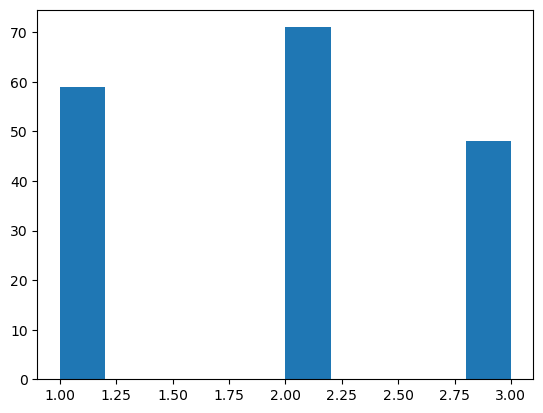

In [31]:
plt.hist(data.clase)

In [32]:
target = data['clase']

In [33]:
data.columns

Index(['clase', ' Alcohol', ' Malic_acid', ' Ash', ' Alcalinity_of_ash',
       ' Magnesium', ' Total_phenols', ' Flavanoids', ' Nonflavanoid_phenols',
       ' Proanthocyanins', ' Color_intensity', ' Hue',
       ' OD280/OD315_of_diluted wines', ' Proline'],
      dtype='object')

In [34]:
predictors_col = [' Alcohol', ' Malic_acid', ' Ash', ' Alcalinity_of_ash',
       ' Magnesium', ' Total_phenols', ' Flavanoids', ' Nonflavanoid_phenols',
       ' Proanthocyanins', ' Color_intensity', ' Hue',
       ' OD280/OD315_of_diluted wines', ' Proline']

In [35]:
predictors = data[predictors_col]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [37]:
tree = DecisionTreeClassifier()

In [38]:
arbol = tree.fit(X_train, y_train)

[Text(0.5, 0.9285714285714286, 'x[12] <= 755.0\ngini = 0.659\nsamples = 142\nvalue = [47, 56, 39]'),
 Text(0.25, 0.7857142857142857, 'x[6] <= 1.235\ngini = 0.501\nsamples = 88\nvalue = [2, 52, 34]'),
 Text(0.125, 0.6428571428571429, 'x[9] <= 3.56\ngini = 0.161\nsamples = 34\nvalue = [0, 3, 31]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]'),
 Text(0.375, 0.6428571428571429, 'x[9] <= 7.7\ngini = 0.172\nsamples = 54\nvalue = [2, 49, 3]'),
 Text(0.3125, 0.5, 'x[12] <= 726.5\ngini = 0.075\nsamples = 51\nvalue = [2, 49, 0]'),
 Text(0.25, 0.35714285714285715, 'x[1] <= 3.925\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]'),
 Text(0.1875, 0.21428571428571427, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(0.3125, 0.21428571428571427, 'x[1] <= 4.14\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.375, 0.071428571

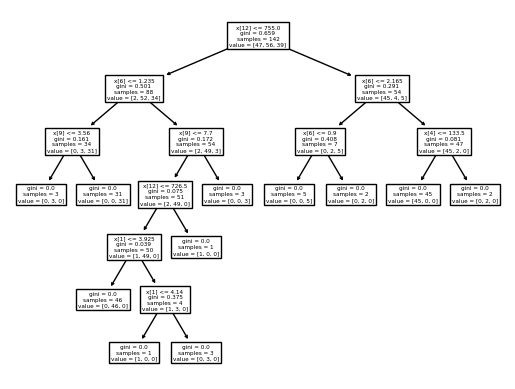

In [39]:
plot_tree(arbol)

In [40]:
predicciones = arbol.predict(X_test)

In [41]:
tabla_contingencia = pd.crosstab(y_test, predicciones, rownames=['Actual'], colnames=['Predicciones'])
print(tabla_contingencia)

Predicciones   1   2  3
Actual                 
1             12   0  0
2              2  13  0
3              0   2  7


In [42]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.8888888888888888

El modelo de árbol de decisiones parece tener un rendimiento bastante bueno, con una alta precisión en la clasificación de vinos en las clases 1, 2 y 3 en el conjunto de prueba.
Sin embargo, es importante tener en cuenta que este análisis es una evaluación inicial del modelo. Para una evaluación más completa, se pueden realizar análisis adicionales, como la validación cruzada y la sintonización de hiperparámetros.
Además, es importante interpretar el árbol para comprender cómo toma decisiones y si las características utilizadas son relevantes para la clasificación de los vinos.
En general, el modelo de árbol de decisiones muestra un buen rendimiento en la clasificación de los vinos en las clases correspondientes, pero se recomienda un análisis más profundo y una validación rigurosa antes de su implementación en un entorno real.